# Домашно 1


### В това домашно задачата ви е да класифицирате всяка картинка от тестовото множество във 53-те различни класа. Накрая покажете какво е accuracy-то на вашия модел върху това тестово множество. (Accuracy = Correct/Total).

For this homework I have used a modified and simplified (otherwise I would not be able to understand what I am doing) version of the CNN for image classification that has been shown on exercises. I have added some reasoning for the decisions made in the cell with the CNN definition. The final output of my model is 80% which I consider a good result for a beginner.

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
from google.colab import files

### За да можете да заредите Kaggle dataset, трябва да се логнете в Kaggle и да изтеглите API Token от Settings -> Create New Token. Това ще свали kaggle.json файл, който трябва да качите в следващата клетка.

In [5]:
from google.colab import files

files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [7]:
! kaggle datasets download -d gpiosenka/cards-image-datasetclassification
! unzip cards-image-datasetclassification.zip -d cards-image-datasetclassification

Предаденият резултат е скъсен до последните 5000 реда.
  inflating: cards-image-datasetclassification/train/jack of spades/059.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/060.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/061.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/062.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/063.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/064.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/065.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/066.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/067.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/068.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/069.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/070.jpg  
  inflati

In [8]:
df = pd.read_csv("/content/cards-image-datasetclassification/cards.csv")
df.head()

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


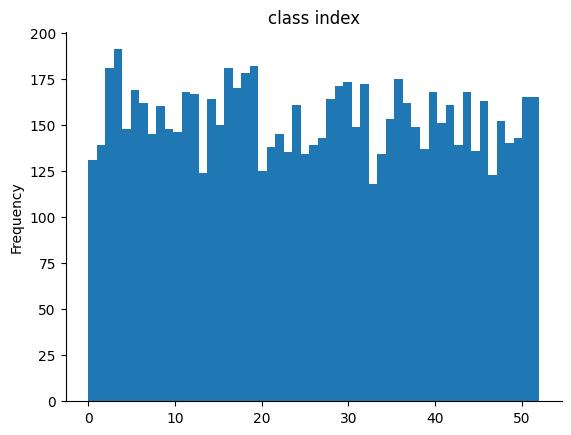

In [9]:
# @title class index

from matplotlib import pyplot as plt
df['class index'].plot(kind='hist', bins=53, title='class index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df[df["data set"] == "train"].shape, df[df["data set"] == "valid"].shape, df[df["data set"] == "test"].shape,

((7625, 5), (265, 5), (265, 5))

In [12]:
df["labels"].unique()

array(['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'joker', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',

In [13]:
import torchvision.transforms.functional
from PIL import Image
!ls 'cards-image-datasetclassification/train'

image_size = torchvision.transforms.functional.get_image_size(Image.open('cards-image-datasetclassification/train/ace of clubs/001.jpg'))
print(image_size)



'ace of clubs'	     'jack of hearts'	  'seven of spades'
'ace of diamonds'    'jack of spades'	  'six of clubs'
'ace of hearts'       joker		  'six of diamonds'
'ace of spades'      'king of clubs'	  'six of hearts'
'eight of clubs'     'king of diamonds'   'six of spades'
'eight of diamonds'  'king of hearts'	  'ten of clubs'
'eight of hearts'    'king of spades'	  'ten of diamonds'
'eight of spades'    'nine of clubs'	  'ten of hearts'
'five of clubs'      'nine of diamonds'   'ten of spades'
'five of diamonds'   'nine of hearts'	  'three of clubs'
'five of hearts'     'nine of spades'	  'three of diamonds'
'five of spades'     'queen of clubs'	  'three of hearts'
'four of clubs'      'queen of diamonds'  'three of spades'
'four of diamonds'   'queen of hearts'	  'two of clubs'
'four of hearts'     'queen of spades'	  'two of diamonds'
'four of spades'     'seven of clubs'	  'two of hearts'
'jack of clubs'      'seven of diamonds'  'two of spades'
'jack of diamonds'   'seven of heart

In [14]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_dataset = datasets.ImageFolder(root='./cards-image-datasetclassification/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True,  num_workers=2)

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

test_dataset = datasets.ImageFolder(root='./cards-image-datasetclassification/test', transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [21]:
import torch.nn.functional as F
import torch.nn as nn

class MyImprovisedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  #for stabilized training and improved generalization (credits to: chatgpt for the idea)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)   #I added a third convolutional layer subsequently
        self.bn3 = nn.BatchNorm2d(64)                              #after convincing myself that I will not get an accuracy higher then 50-60% with two conv layers only


        self.pool = nn.MaxPool2d(2, 2)
        self.dropout_conv = nn.Dropout(0.25)  #applying dropout to prevent the model from just memorizing the training set
        self.dropout_fc = nn.Dropout(0.5)

        self.fc1 = nn.Linear(64 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 53)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout_conv(x)

        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout_conv(x)

        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout_conv(x)

        x = torch.flatten(x, 1)

        x = self.dropout_fc(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [16]:
model = MyImprovisedCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

device

device(type='cuda')

In [22]:
import time

for epoch in range(25):
    start = time.time()
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    end = time.time()
    print(f"Epoch {epoch+1} finished in {end - start:.2f} seconds")

Epoch 1 finished in 15.28 seconds
Epoch 2 finished in 15.09 seconds
Epoch 3 finished in 14.93 seconds
Epoch 4 finished in 15.89 seconds
Epoch 5 finished in 14.88 seconds
Epoch 6 finished in 14.80 seconds
Epoch 7 finished in 14.96 seconds
Epoch 8 finished in 14.78 seconds
Epoch 9 finished in 14.72 seconds
Epoch 10 finished in 16.89 seconds
Epoch 11 finished in 14.74 seconds
Epoch 12 finished in 14.76 seconds
Epoch 13 finished in 14.86 seconds
Epoch 14 finished in 14.90 seconds
Epoch 15 finished in 14.81 seconds
Epoch 16 finished in 15.66 seconds
Epoch 17 finished in 14.82 seconds
Epoch 18 finished in 14.76 seconds
Epoch 19 finished in 14.80 seconds
Epoch 20 finished in 14.72 seconds
Epoch 21 finished in 14.76 seconds
Epoch 22 finished in 16.82 seconds
Epoch 23 finished in 14.63 seconds
Epoch 24 finished in 17.10 seconds
Epoch 25 finished in 17.00 seconds


In [23]:
correct = 0
total = 0
for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    correct += (preds == labels).sum().item()
    total += labels.size(0)

print("Accuracy:", correct / total)

Accuracy: 0.8037735849056604
